In [0]:
import numpy as np
import random
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [0]:
def simulate_AR_1_model(N, param):
    y = np.empty(0)
    x0 = np.random.rand() + 100
    y = np.append(y,x0)
    for i in range(N):
        y = np.append(y, (y[i]*param + np.random.normal(0,.25)))
    return y

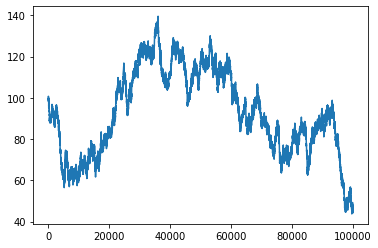

In [452]:
y = simulate_AR_1_model(100000, 1)
plt.plot(y)
plt.show()

In [0]:
def generate_threshold_samples(data, intervals, rand_samps = 10000):
  matrix_thresholds = np.empty((0,rand_samps))
  for N in intervals:
    start_index = np.random.randint(0,data.shape[0]-N+1, rand_samps)
    thresholds = 100 * np.array([(np.max(data[i:i+N])/data[i]) - 1 for i in start_index])
    matrix_thresholds = np.append(matrix_thresholds, [thresholds], axis = 0)
  return matrix_thresholds

In [0]:
w = np.arange(1000, 20, -5)
t_test = generate_threshold_samples(y, w, 50000)

In [494]:
print(t_test.shape)
medians = []
for i in range(t_test.shape[0]):
  medians.append(np.median(t_test[i]))

(196, 50000)


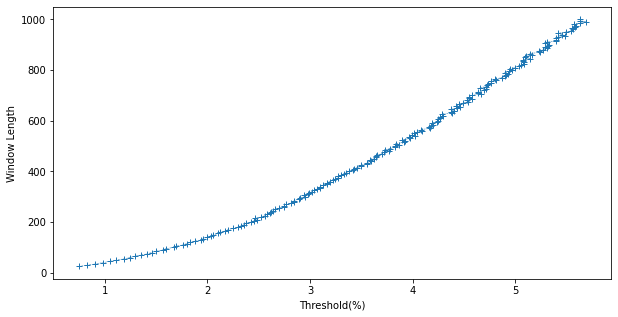

In [495]:
plt.figure(figsize=(10,5))
plt.plot(medians, w, '-+', linestyle = '--', linewidth = 0.5)
plt.xlabel('Threshold(%)')
plt.ylabel('Window Length')
plt.title("")
plt.show()

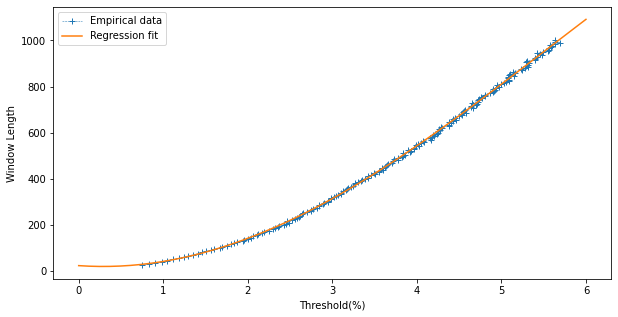

In [496]:
poly_fit = np.poly1d(np.polyfit(medians, w, 4))
x_vals = np.linspace(0, 6)
y_vals = poly_fit(x_vals) 
plt.figure(figsize=(10,5))
plt.plot(medians, w, '-+', linestyle = '--', linewidth = 0.5, label = 'Empirical data')
plt.plot(x_vals, y_vals, label= 'Regression fit')
plt.xlabel('Threshold(%)')
plt.ylabel('Window Length')
plt.legend()
plt.title("")
plt.show()
